Training set shape: (44758, 41)
  Text-ID  Sentence-ID                                               Text  \
0  EN_001            1  Hispanic Voters Are Losing Faith In The Democr...   
1  EN_001            2  The support of Hispanic voters at the midterms...   
2  EN_001            3  U.S. President Joe Biden speaks to employees a...   
3  EN_001            4  (Julie Bennett/Getty Images) According to a Qu...   
4  EN_001            5  This marks the lowest approval rating of any d...   

   Self-direction: thought attained  Self-direction: thought constrained  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   Self-direction: action attained  Self-directi

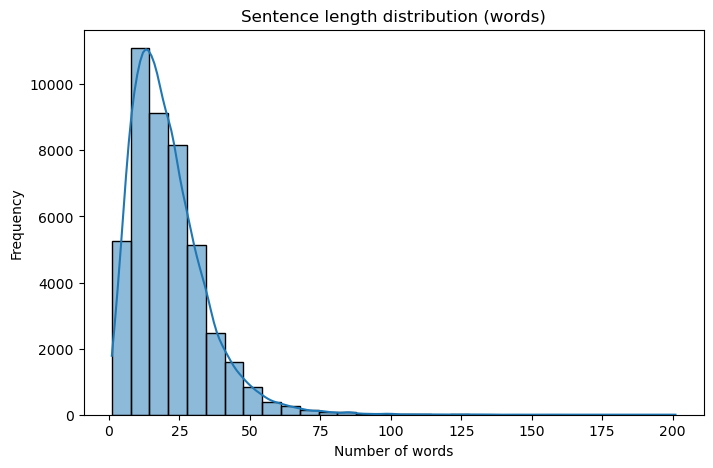

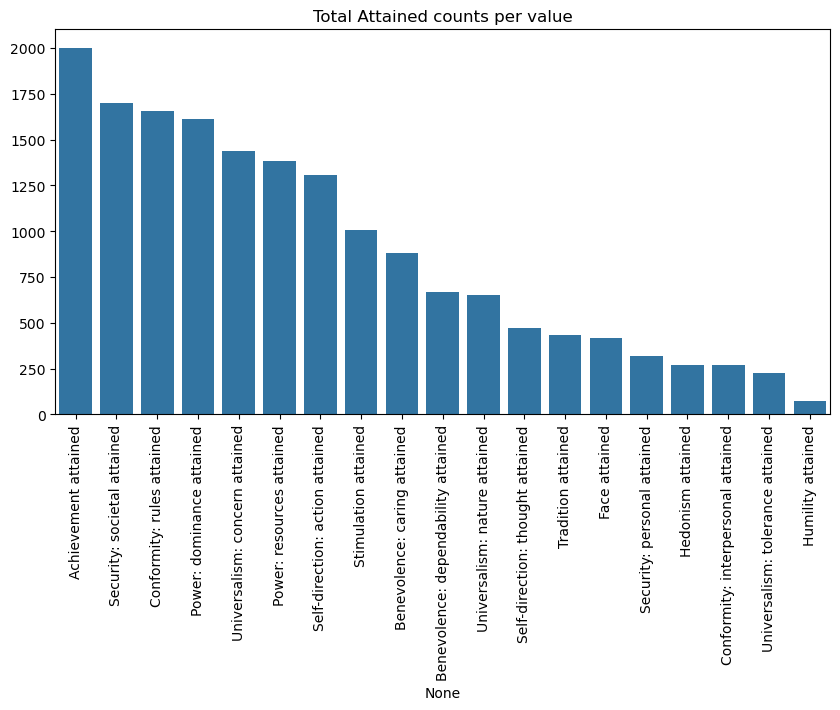

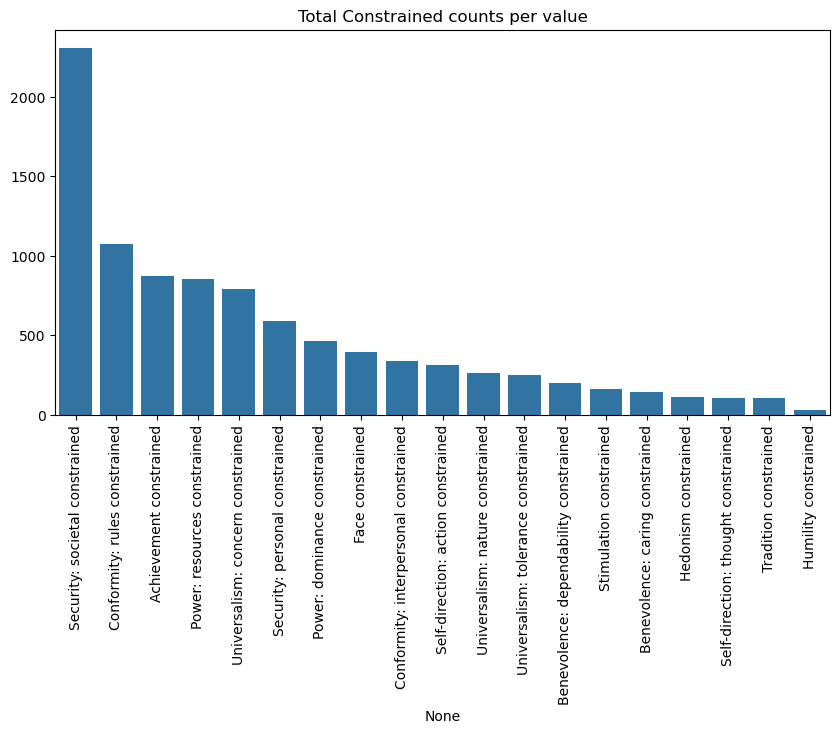

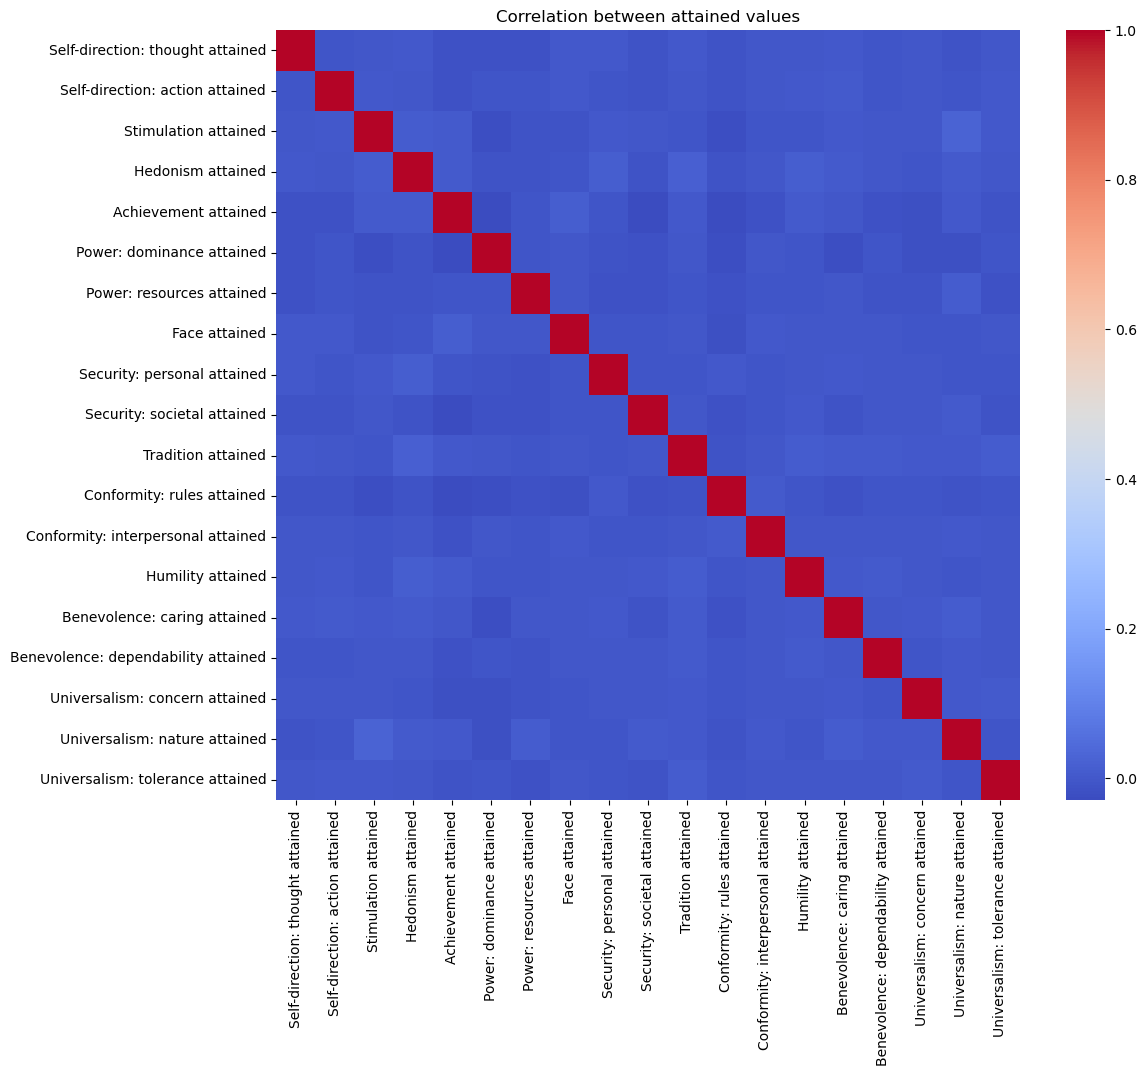

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


sentences_train = pd.read_csv("data/sentences_training.tsv", sep="\t")
labels_train = pd.read_csv("data/labels_training.tsv", sep="\t")

sentences_val = pd.read_csv("data/sentences_validation.tsv", sep="\t")
labels_val = pd.read_csv("data/labels_validation.tsv", sep="\t")

sentences_test = pd.read_csv("data/sentences_test.tsv", sep="\t")
labels_test = pd.read_csv("data/labels_test.tsv", sep="\t")


train_df = pd.merge(sentences_train, labels_train, on=["Text-ID", "Sentence-ID"])


print("Training set shape:", train_df.shape)
print(train_df.head())


print(train_df.isnull().sum())


train_df["text_length"] = train_df["Text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(train_df["text_length"], bins=30, kde=True)
plt.title("Sentence length distribution (words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


value_columns = [col for col in labels_train.columns if col not in ["Text-ID", "Sentence-ID"]]
attained_cols = [col for col in value_columns if col.endswith("attained")]
constrained_cols = [col for col in value_columns if col.endswith("constrained")]

attained_sum = labels_train[attained_cols].sum().sort_values(ascending=False)
constrained_sum = labels_train[constrained_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=attained_sum.index, y=attained_sum.values)
plt.xticks(rotation=90)
plt.title("Total Attained counts per value")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=constrained_sum.index, y=constrained_sum.values)
plt.xticks(rotation=90)
plt.title("Total Constrained counts per value")
plt.show()


attained_corr = labels_train[attained_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(attained_corr, cmap="coolwarm", annot=False)
plt.title("Correlation between attained values")
plt.show()
